In [738]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Step 1: Reading  the dataset

In [739]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [740]:
lead_df= pd.read_csv(r'C:\Users\Mayank\Desktop\dataset\leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [741]:
#checking the shape of the dataframe
lead_df.shape

(9240, 37)

In [742]:
# let's check breif about numeric columns
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [743]:
# let's see the datatypes and null of each column
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### step2: Data Cleaning, Manipulation 

In [744]:
# lets Check the null values
lead_df1=(lead_df.isnull().mean()*100).sort_values(ascending=False)
lead_df1

Lead Quality                                    51.59
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Index                      45.65
Tags                                            36.29
Lead Profile                                    29.32
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
How did you hear about X Education              23.89
Specialization                                  15.56
City                                            15.37
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

#### Inference:
As we can see there is high number of null values so we can drop the columns 

In [745]:
null_cols = lead_df.isnull().sum().sort_values(ascending = False)
null_cols = null_col[null_col.values >(0.40*len(lead_df))]
null_cols

How did you hear about X Education    7250
Lead Profile                          6855
dtype: int64

In [746]:
l=list(null_cols.index.values)
lead_df.drop(labels=l,axis=1,inplace=True)

In [747]:
# checking the null values again
lead_df.isnull().sum().sort_values()


Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                

In [748]:
# Rechecking the percentage of missing values:
missing_values = round(100*(lead_df.isnull().sum()/len(lead_df)),2)
print(missing_values.sort_values())

Prospect ID                                      0.00
I agree to pay the amount through cheque         0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
A free copy of Mastering The Interview           0.00
Magazine                                         0.00
Search                                           0.00
Newspaper Article                                0.00
Last Notable Activity                            0.00
Lead Number                                      0.00
Total Time Spent on Website                      0.00
Converted                                        0.00
Do Not Call                                      0.00
Do Not Email                

Inference:
Lead number and prospect Id both show unique ids so remiving both 

In [749]:
lead_df.drop(["Prospect ID",'Lead Number' ] , axis= 1 , inplace = True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [750]:
lead_df.shape

(9240, 33)

In [751]:
# check null values again:
lead_df.isnull().sum().sort_values()

Lead Origin                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
A free copy of Mastering The Interview              0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
X Education Forums                                  0
Last Notable Activity                               0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Lead Source                 

###  Handling the 'Select' value which is  present in most of the Categorical columns and filling it with NAN

In [752]:
# replacing 'Select' values with NaN.
lead_df = lead_df.replace('Select', np.nan)

In [753]:
# lets check the null values again after replacing
lead_df.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Get updates on DM Content                           0
Update me on Supply Chain Co

In [754]:
#Checking  percentage of missing values in each column
null_value_col = round(100*(lead_df.isnull().sum()/len(lead_df)), 2).sort_values(ascending=False)
null_value_col

Lead Quality                                    51.59
Asymmetrique Activity Score                     45.65
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Score                      45.65
Asymmetrique Profile Index                      45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Co

In [755]:
null_col=lead_df.isnull().sum().sort_values(ascending=False)
null_col=null_col[null_col.values>(len(lead_df)*0)]

There are some columns with  High Percentage of Missing Values. We can remove the columns with null values greater than 40% .

In [756]:
#checking null value greater than 40% and droping them 
null_value40= null_value_col[null_value_col.values > 40].sort_values(ascending=False)
null_value40

Lead Quality                  51.59
Asymmetrique Activity Score   45.65
Asymmetrique Activity Index   45.65
Asymmetrique Profile Score    45.65
Asymmetrique Profile Index    45.65
dtype: float64

In [757]:
l1=list(null_value40.index.values)
lead_df.drop(labels=l1,axis=1,inplace=True)

In [758]:

round(100*(lead_df.isnull().sum()/len(lead_df)), 2).sort_values(ascending=False)

City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
Update me on Supply Chain Content                0.00
Lead Origin                                      0.00
Digital Advertisement                            0.00
Get updates on DM Content                        0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Through Recommendations                          0.00
Magazine                    

In [759]:
#inializing categorical and continous column
cat_cols = lead_df.select_dtypes(include=['category','object']).columns.tolist()
cont_cols=lead_df.select_dtypes(include=['int64','float64']).columns.tolist()



In [760]:
for j in cat_cols:
    print(j)
    print()
    print(lead_df[j].value_counts())
    print()
    print("percentage",100*lead_df[j].value_counts(normalize=True))
    print()

Lead Origin

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

percentage Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: Lead Origin, dtype: float64

Lead Source

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int

In [761]:
# filling the null values in categorical columns by mode 
for p in cat_cols:
    if lead_df[p].isnull().sum()>0:
        value=lead_df[p].mode()[0]
        lead_df[p]=lead_df[p].fillna(value)

In [762]:
# filling the null values in continuous columns by median 
for q in cont_cols:
    if lead_df[q].isnull().sum()>0:   
        value=lead_df[q].median()
        lead_df[q]=lead_df[q].fillna(value)

In [763]:
#lets see if null values are replaced 
lead_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

I can see tags still showing null values so will remove it. Also It's observed that several columns in the dataset predominantly contain a single value, and that value is "No" for most, if not all, data points. These columns include features such as "Do Not Call," "Search," "Magazine," "Newspaper Article," "X Education Forums," "Newspaper," "Digital Advertisement," "Through Recommendations," "Receive More Updates About Our Courses," "Update me on Supply Chain Content," "Get updates on DM Content," and "I agree to pay the amount through cheque."
So it's best to drop these columns won't be much help.




In [764]:
lead_df = lead_df.drop(['Tags','Country','What matters most to you in choosing a course','Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content', 
                  'I agree to pay the amount through cheque'], axis=1)

In [765]:
lead_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00
mean,0.39,3.44,487.70,2.36
std,0.49,4.82,548.02,2.15
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,12.00,1.00
50%,0.00,3.00,248.00,2.00
75%,1.00,5.00,936.00,3.00
max,1.00,251.00,2272.00,55.00


In [766]:
lead_df.shape

(9240, 13)

In [767]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Finance Management,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Finance Management,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Finance Management,Unemployed,Mumbai,No,Modified


#### converting some binary variables (Yes/No) to 0/1

In [768]:
print(lead_df["Do Not Email"].value_counts())

print(lead_df["A free copy of Mastering The Interview"].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [769]:
# Replacing the values of Yes =1 & No= 0
lead_df["Do Not Email"].replace(to_replace = "No" , value = 0 , inplace = True)
lead_df["Do Not Email"].replace(to_replace = "Yes" , value = 1 , inplace = True)
lead_df["A free copy of Mastering The Interview"].replace(to_replace = "No" , value = 0 , inplace = True)
lead_df["A free copy of Mastering The Interview"].replace(to_replace = "Yes" , value = 1 , inplace = True)

In [770]:
# checking the value of the data
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.00,0,0.00,Page Visited on Website,Finance Management,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,5.00,674,2.50,Email Opened,Finance Management,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,Converted to Lead,Finance Management,Unemployed,Mumbai,0,Modified


### step 3: Outlier Analysis

In [771]:
#checking the data percentile
lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.39,3.44,487.70,2.36,0.31
std,0.27,0.49,4.82,548.02,2.15,0.46
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,1.00,12.00,1.00,0.00
50%,0.00,0.00,3.00,248.00,2.00,0.00
75%,0.00,1.00,5.00,936.00,3.00,1.00
90%,0.00,1.00,7.00,1380.00,5.00,1.00
95%,1.00,1.00,10.00,1562.00,6.00,1.00
99%,1.00,1.00,17.00,1840.61,9.00,1.00


-it can be visible that outliers is there in the columns TotalVisits and Page Views Per Visit columns

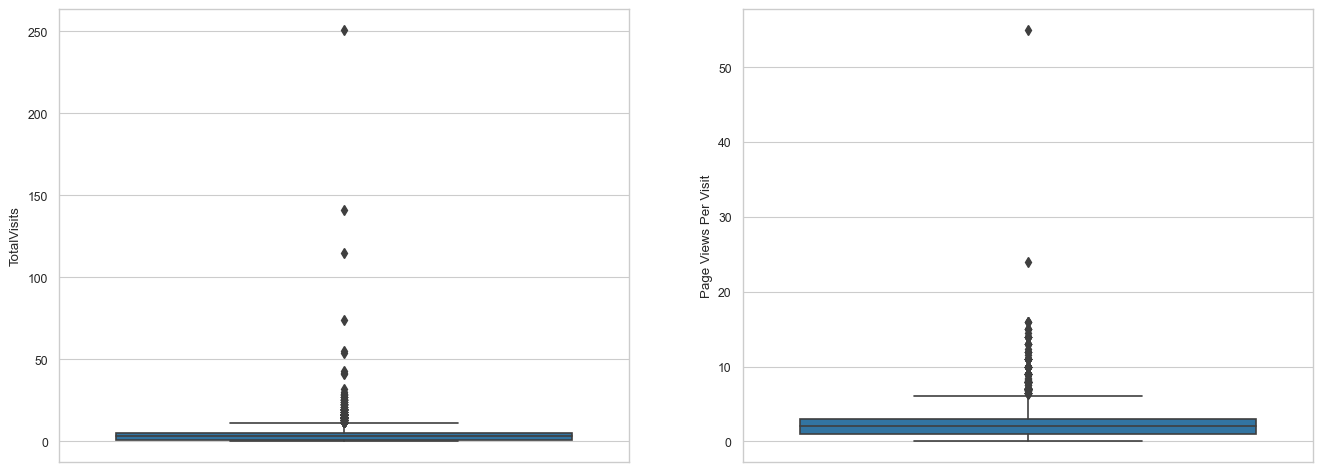

In [772]:
# Checking the outliers of numeric columns

plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = lead_df)
plt.subplot(3,3,2)
sns.boxplot(y = 'Page Views Per Visit', data = lead_df)
plt.show()

In [773]:
# Removing the values above 99% for Total Visits

Total_visits = lead_df['TotalVisits'].quantile(0.99)
lead_df = lead_df[lead_df["TotalVisits"] < Total_visits]
lead_df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count   9141.00
mean       3.18
std        2.91
min        0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%        9.00
99%       13.00
max       16.00
Name: TotalVisits, dtype: float64

In [774]:
# Removing values beyond 99% for page Views Per Visit

Page_visit = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df["Page Views Per Visit"] < Page_visit]
lead_df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count   9029.00
mean       2.23
std        1.82
min        0.00
25%        1.00
50%        2.00
75%        3.00
90%        5.00
95%        6.00
99%        7.00
max        8.00
Name: Page Views Per Visit, dtype: float64

In [775]:
#lets recheck the percentile data 
lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9029.00,9029.00,9029.00,9029.00,9029.00,9029.00
mean,0.08,0.39,3.09,483.13,2.23,0.31
std,0.27,0.49,2.80,547.42,1.82,0.46
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,1.00,7.00,1.00,0.00
50%,0.00,0.00,3.00,245.00,2.00,0.00
75%,0.00,1.00,4.00,929.00,3.00,1.00
90%,0.00,1.00,7.00,1378.00,5.00,1.00
95%,1.00,1.00,8.00,1558.00,6.00,1.00
99%,1.00,1.00,13.00,1839.72,7.00,1.00


In [776]:
# Finding the percentage of data retained

Percent_data = round(100*(len(lead_df)/9240),2)
print(Percent_data)

97.72


In [777]:
lead_df.shape

(9029, 13)

In [778]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

- Now we can see data is almost cleaned we can start our analysis 

### Step- 4: Visualising the data

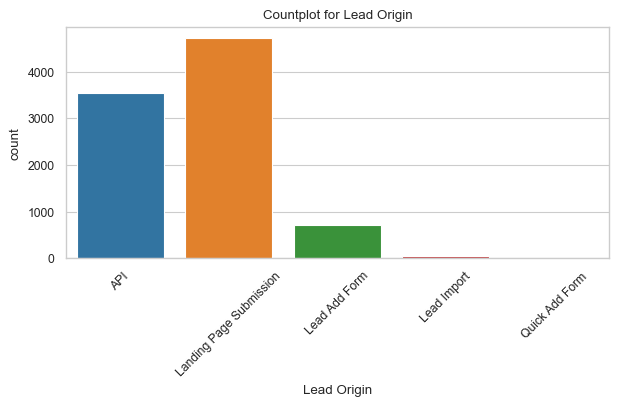

In [779]:
#Univariate analysis
plt.figure(figsize = (7, 3))

sns.countplot(x='Lead Origin', data=lead_df)

plt.xticks(rotation=45)
plt.title('Countplot for Lead Origin')

plt.show()
    

Text(0.5, 1.0, 'Countplot for Lead Source')

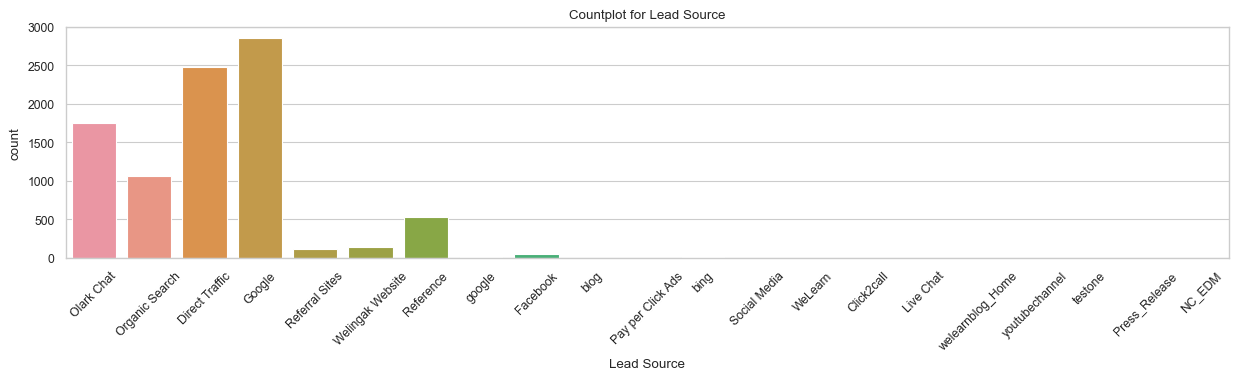

In [780]:
plt.figure(figsize = (15, 3))

sns.countplot(x='Lead Source', data=lead_df)

plt.xticks(rotation=45)
plt.title('Countplot for Lead Source')



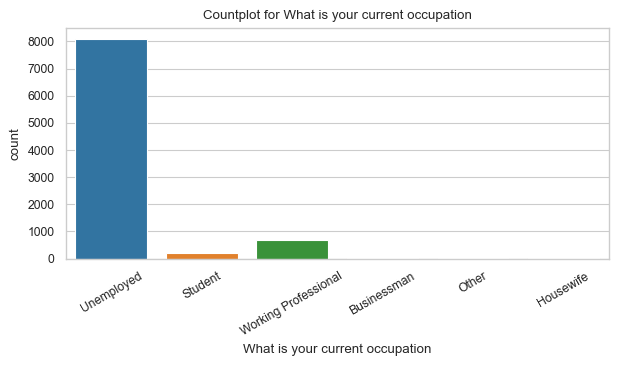

In [781]:
plt.figure(figsize=(7, 3))

# Trim leading and trailing whitespaces from the column name
column_name = ' What is your current occupation'.strip()

sns.countplot(x=column_name, data=lead_df)

plt.xticks(rotation=30)
plt.title('Countplot for What is your current occupation')

plt.show()


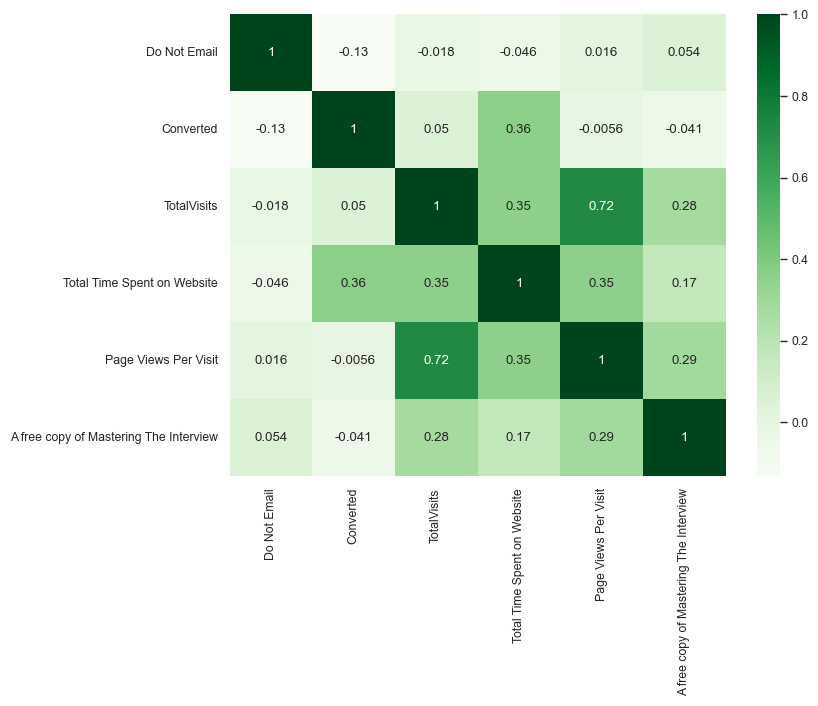

In [782]:
#Checking correlations of numeric values

plt.figure(figsize=(8,6))
# heatmap
sns.heatmap(lead_df.corr(), cmap="Greens", annot=True)
plt.show()

Inference-page views per visits and total visits shows high correlation.

In [783]:
cate_col1=['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation']

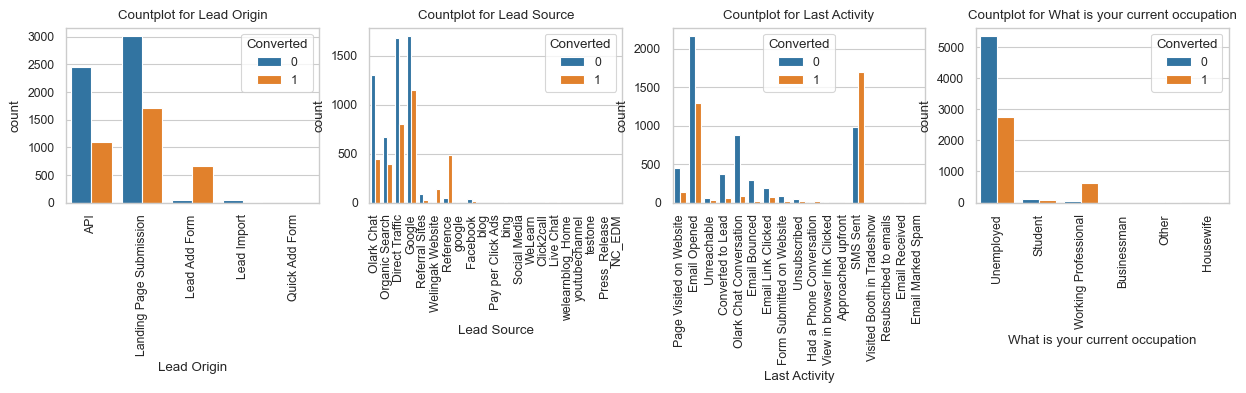

In [784]:
plt.figure(figsize = (15, 5))

for index, column in enumerate(cate_col1, start=1):
    plt.subplot(2, 4, index)
    sns.countplot(x=column, hue='Converted', data=lead_df)
    plt.xticks(rotation=90)
    plt.title(f'Countplot for {column}')

plt.show()
    

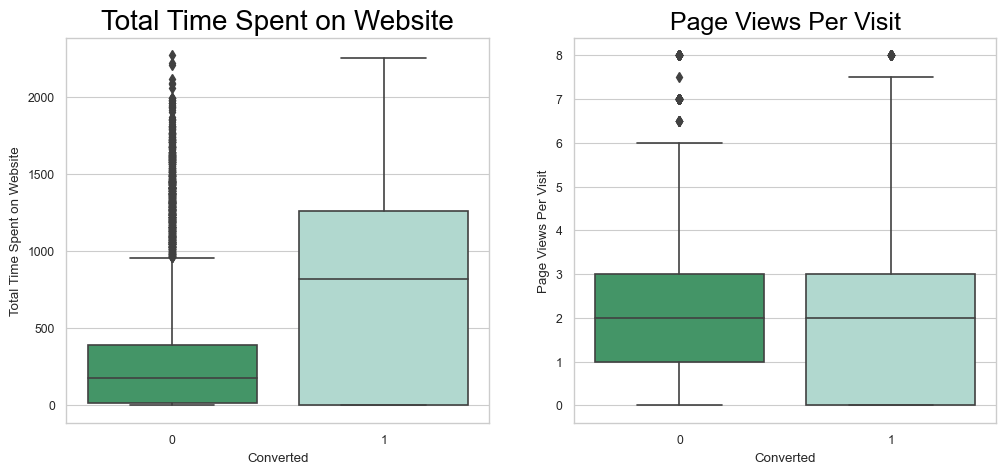

In [785]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=lead_df, palette="BuGn_r")
plt.title("Total Time Spent on Website", fontdict={'fontsize': 20, 'color': 'black'})

plt.subplot(1, 2, 2)
sns.boxplot(x="Converted", y="Page Views Per Visit", data=lead_df, palette="BuGn_r")
plt.title("Page Views Per Visit", fontdict={'fontsize': 18, 'color': 'black'})

plt.show()


####  bivariate Analysis - Categorical Variables

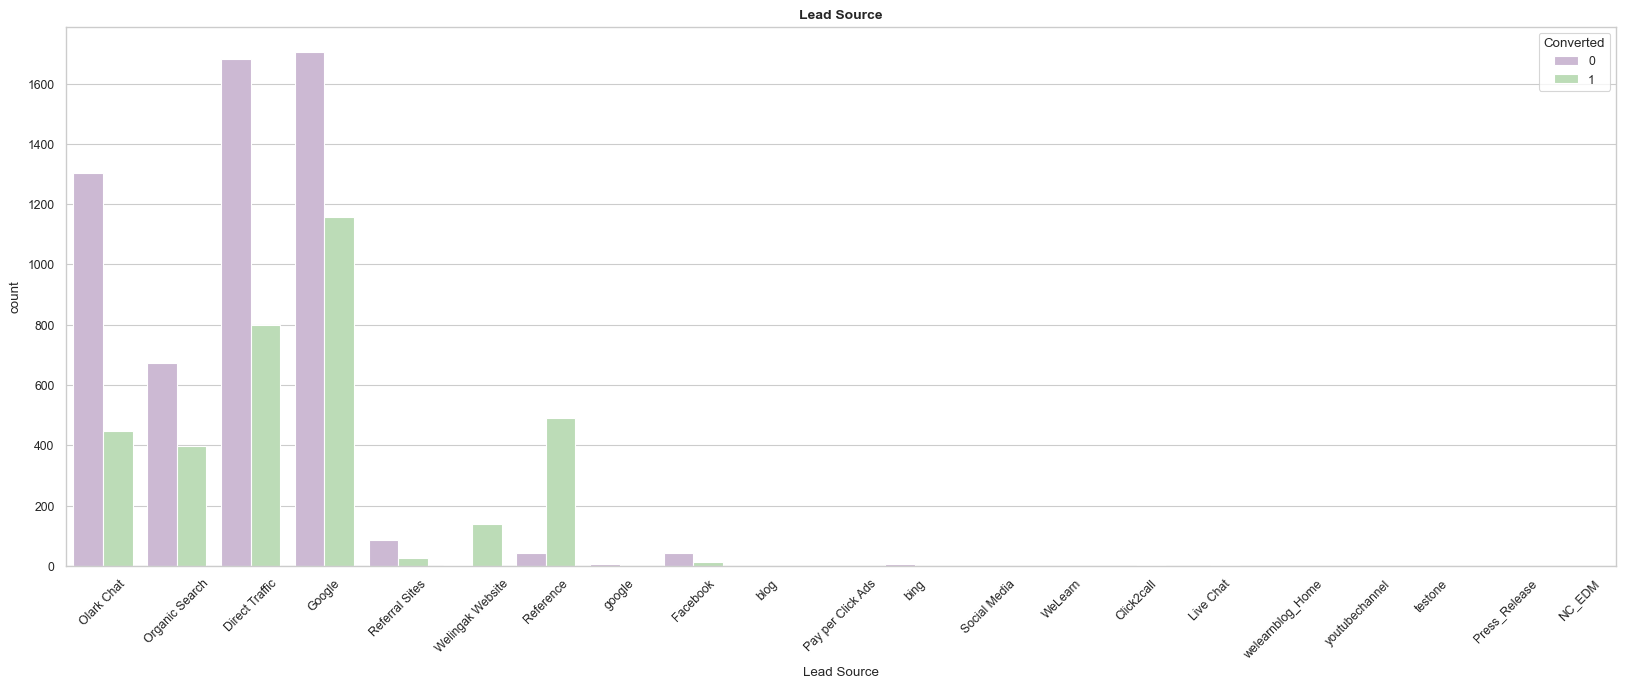

In [786]:
plt.figure(figsize = (20,7))

sns.countplot(x=lead_df['Lead Source'], hue = lead_df.Converted, palette = "PRGn")
plt.title('Lead Source', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

Inference-
Google has the highest conversion rate. Also we can see two google lets replace it with Google

In [787]:
lead_df.replace('google', 'Google', inplace=True)


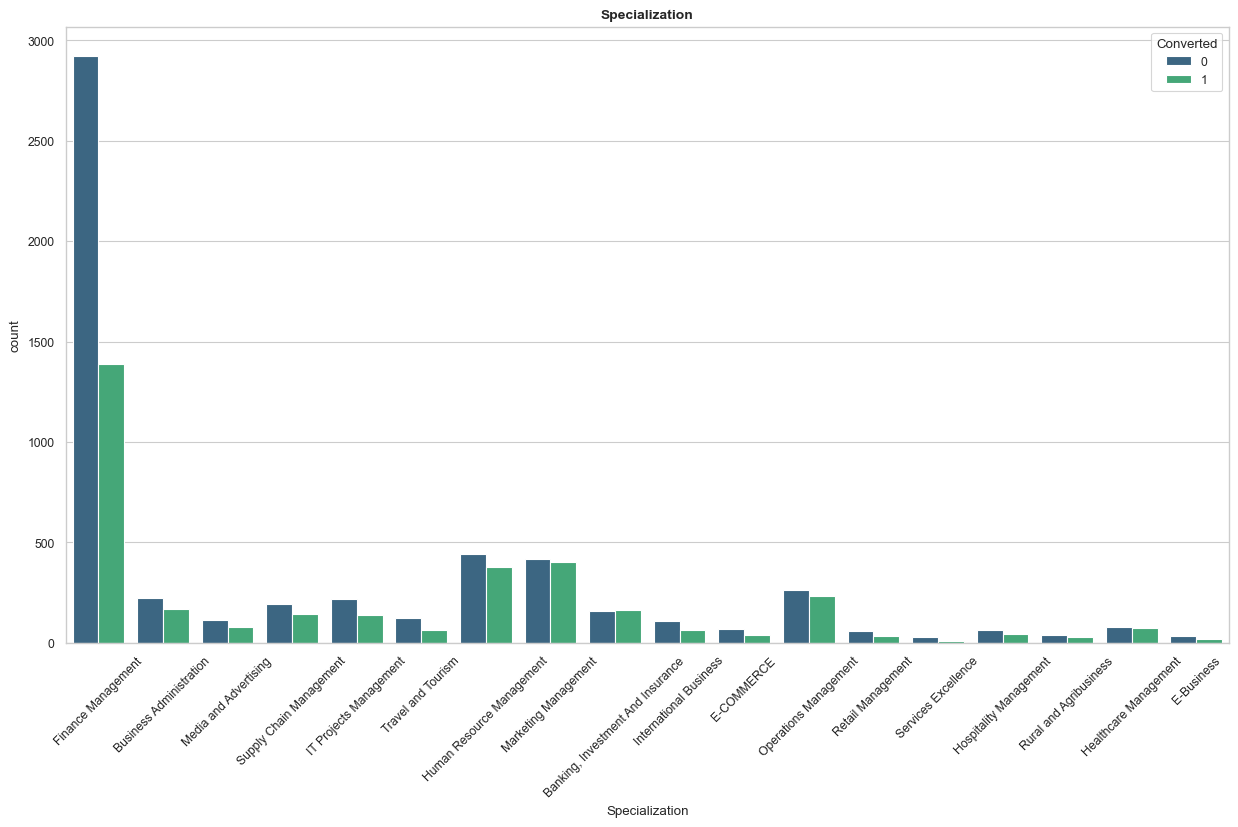

In [788]:
plt.figure(figsize = (15,8))

sns.countplot(x=lead_df['Specialization'], hue = lead_df.Converted, palette = "viridis")
plt.title('Specialization', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)


plt.show()

Inference-
Lead from Specialization who are unknown/Select columns which are imputed has the highest rate of conversion.

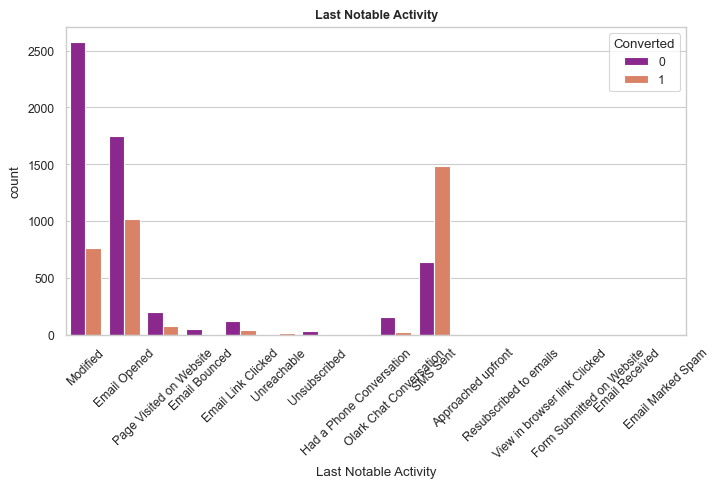

In [789]:
plt.figure(figsize = (8,4))

sns.countplot(x=lead_df['Last Notable Activity'], hue = lead_df.Converted, palette = "plasma")
plt.title('Last Notable Activity', fontsize = 9, fontweight = 'bold')
plt.xticks(rotation = 44)

plt.show()

Inference-
 Last Notable Activity was found to be SMS Sent had the best conversion rate.

In [790]:
# Checking Imbalance of Data Converted_0 == 0(Lead not Converted) test_data1== 1 (Lead Converted)

Converted_0=lead_df[lead_df["Converted"]==0]
Converted_1=lead_df[lead_df["Converted"]==1]
print("Shape of leads not converted  -", Converted_0.shape)
print("Shape of  Converted Lead -", Converted_1.shape)

Shape of leads not converted  - (5552, 13)
Shape of  Converted Lead - (3477, 13)


In [791]:
#Calculating Data Imbalance
Imbalance= round((Converted_0.shape[0])/(Converted_1.shape[0]),4)
print("Imbalance Ratio is =",Imbalance)

Imbalance Ratio is = 1.5968


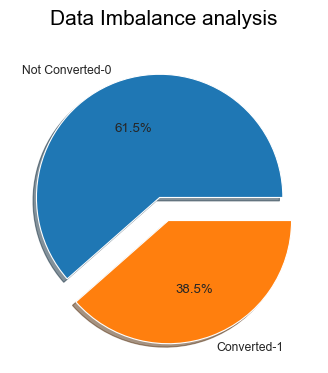

In [792]:
# Checking data distribution using Pie Chart
plt.figure(figsize=[4,4])
explode = (0.1, 0.1) 
plt.pie([Converted_0.shape[0],Converted_1.shape[0]], labels=["Not Converted-0","Converted-1"], explode=explode, autopct='%1.1f%%',shadow=True)
plt.title("Data Imbalance analysis\n", fontdict={'fontsize':15,'fontweight':4,'color':'black'})
plt.show()

### Step- 5: Preparing data for Modelling

- Creating Dummy variables
- Splitting the Data into Train & Test Sets
- Scaling The Features

In [793]:
# Creating a dummy variable 
dummy = pd.get_dummies(lead_df[['Lead Origin', 'What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

#merging the dataframes
lead_df = pd.concat([lead_df, dummy], axis=1)

In [794]:
lead_df=lead_df.drop(['Lead Origin','What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity'],1)

In [795]:
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.00,1532,2.00,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.00,1428,1.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [796]:
lead_df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.00,-0.13,-0.02,-0.05,0.02,0.05,0.09,-0.02,-0.02,0.04,-0.01,-0.00,0.01,0.04,-0.05,0.01,-0.01,0.04,-0.00,0.05,0.01,0.01,0.03,-0.04,0.01,0.01,-0.02,0.07,0.01,-0.02,0.00,-0.01,0.01,0.02,0.06,0.00,0.05,0.10,-0.02,-0.06,-0.00,-0.00,-0.05,0.04,-0.00,0.04,-0.04,-0.01,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.04,-0.06,0.63,-0.04,0.05,-0.22,-0.00,-0.02,-0.01,-0.05,0.06,-0.00,-0.02,0.01,0.27,-0.01,-0.00,0.28,-0.04,0.05,-0.19,-0.00,-0.00,-0.01,0.12,-0.01,0.04,-0.00,-0.02,-0.01,0.25,-0.00
Converted,-0.13,1.00,0.05,0.36,-0.01,-0.04,-0.05,0.33,-0.02,0.01,0.04,0.02,-0.01,-0.28,0.31,0.01,0.02,0.01,0.04,-0.01,0.02,-0.00,-0.01,-0.12,0.03,0.01,0.05,0.00,-0.01,0.07,0.01,0.04,-0.01,0.01,-0.02,0.02,-0.01,-0.08,-0.02,0.03,0.02,0.01,-0.13,-0.01,-0.01,-0.01,0.27,-0.03,0.00,0.01,0.16,-0.01,-0.01,-0.01,-0.01,-0.01,-0.12,-0.12,-0.04,0.02,-0.02,0.02,-0.03,0.04,-0.21,-0.08,0.01,0.33,-0.01,-0.02,-0.02,-0.01,-0.04,-0.04,0.02,-0.02,0.01,-0.01,0.04,-0.25,-0.07,-0.04,0.01,0.36,0.04,-0.02,-0.01
TotalVisits,-0.02,0.05,1.00,0.35,0.72,0.28,0.43,-0.25,-0.05,-0.00,-0.01,0.02,-0.03,0.01,-0.00,0.09,0.06,0.07,0.09,0.02,0.07,0.03,0.04,-0.31,0.05,0.02,0.09,0.05,0.06,0.05,0.07,0.06,0.03,0.04,0.02,0.06,0.09,0.13,-0.04,0.22,-0.02,0.01,-0.49,0.28,-0.00,0

### Splitting the data into train and test sets

In [797]:
X = lead_df.drop(['Converted'], axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.00,1532,2.00,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.00,1428,1.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [798]:
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [799]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [800]:
# Checking Shape of Train & Test
print("Train_data shape :-",X_train.shape)
print("Test_data shape :-",X_test.shape)

Train_data shape :- (6320, 86)
Test_data shape :- (2709, 86)


### Feature scaling using Minmax scaling

In [801]:
from sklearn.preprocessing import MinMaxScaler

In [802]:
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5493,0,0.12,0.04,0.25,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8064,0,0.19,0.04,0.38,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4716,1,0.19,0.10,0.38,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9117,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2402,0,0.38,0.38,0.25,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### step 6: Model Building

In [803]:
import statsmodels.api as sm

In [804]:
# Logistic regression model with StatsModels
X_train=sm.add_constant(X_train)
lgm1=sm.GLM(y_train,X_train, family=sm.families.Binomial())
lgm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Nov 2023   Deviance:                   1.4976e+05
Time:                        22:05:25   Pearson chi2:                 7.32e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 5.357e+15   5.26e+07   1.02e+08      0.000    5.36e+15    5.36e+15
Do Not Email                                         -5.975e+14   4.56e+06  -1.31e+08      0.000   -5.98e+14   -5.98e+14
TotalVisits                                          -1.323e+14   7.54e+06  -1.75e+07      0.000   -1.32e+14   -1.32e+14
Total Time Spent on Website                           1.681e+14   3.99e+06   4.22e+07      0.000    1.68e+14    1.68e+14
Page Views Per Visit                                  2.617e+14   6.32e+06   4.14e+07      0.000    2.62e+14    2.62e+14
A free copy of Mastering The Interview                5.299e+13   2.69e+06   1.97e+07      0.000     5.3e+13     5.3e+13
Lead Origin_Landing Page Submission                  -1.986e+14   2.99e+06  -6.64e+07      0.000   -1.99e+14   -1.99e+14
Lead Origin_Lead Add Form                             7.674e+14   1.33e+07   5.79e+07      0.000    7.67e+14    7.67e+14
Lead Origin_Lead Import                               5.187e+14    4.8e+07   1.08e+07      0.000    5.19e+14    5.19e+14
Lead Origin_Quick Add Form                              2.9e+06      0.040   7.26e+07      0.000     2.9e+06     2.9e+06
What is your current occupation_Housewife             4.609e+15   4.09e+07   1.13e+08      0.000    4.61e+15    4.61e+15
What is your current occupation_Other                -1.351e+15    3.7e+07  -3.65e+07      0.000   -1.35e+15   -1.35e+15
What is your current occupation_Student              -8.033e+14   3.08e+07  -2.61e+07      0.000   -8.03e+14   -8.03e+14
What is your current occupation_Unemployed           -6.146e+14   3.02e+07  -2.03e+07      0.000   -6.15e+14   -6.15e+14
What is your current occupation_Working Professional  3.963e+14   3.04e+07    1.3e+07      0.000    3.96e+14    3.96e+14
City_Other Cities                                     1.594e+13   3.33e+06   4.79e+06      0.000    1.59e+13    1.59e+13
City_Other Cities of Maharashtra                      3.883e+14   3.27e+06   1.19e+08      0.000    3.88e+14    3.88e+14
City_Other Metro Cities                              -1.268e+14    4.5e+06  -2.82e+07      0.000   -1.27e+14   -1.27e+14
City_Thane & Outskirts                               -5.371e+13   3.34e+06  -1.61e+07      0.000   -5.37e+13   -5.37e+13
City_Tier II Cities                                   3.469e+13      1e+07   3.47e+06      0.000    3.47e+13    3.47e+13
Specialization_Business Administration               -1.318e+14    6.3e+06  -2.09e+07      0.000   -1.32e+14   -1.32e+14
Specialization_E-Business                            -1.045e+14   1.28e+07  -8.14e+06      0.000   -1.04e+14   -1.04e+14
Specialization_E-COMMERCE                             3.05

- Now we have  variables selected by RFE and now we care about the stats part, i.e. the p-values & the VIFs, let's use these variables to create a logistic regression model using statsmodels.

### Using RFE(Recursive Feature Selection)

In [805]:
#Selecting 15 Variables using RFE
from sklearn.linear_model import LogisticRegression
logregres = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logregres, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [806]:
# top 15 feature Selected by RFE for Modelling are:
rfe.support_

array([False,  True,  True,  True, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False])

In [807]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 64),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 58),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Origin_Quick Add Form', False, 70),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 14),
 ('What is your current occupation_Student', False, 15),
 ('What is your current occupation_Unemployed', False, 12),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 50),
 ('City_Other Cities of Maharashtra', False, 48),
 ('City_Other Metro Cities', False, 68),
 ('City_Thane & Outskirts', False, 42),
 ('City_Tier II Cities', False, 34),
 ('Specialization_Business Administration', False, 45),
 ('Specialization_E-Business', False, 60),
 ('Specia

In [808]:
# list of columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [809]:
# list of columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['const', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_O

In [810]:
#Dataset selected by RFE are 
X_train[cols].head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Working Professional,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
5493,0,0.12,0.04,0,0,0,0,0,0,0,0,0,1,0,0
8064,0,0.19,0.04,0,0,0,0,0,0,0,0,0,1,0,0
4716,1,0.19,0.10,0,0,0,0,0,0,0,0,0,1,0,0
9117,0,0.00,0.00,0,0,0,1,0,0,0,1,0,0,0,0
2402,0,0.38,0.38,0,0,0,0,0,0,0,1,0,0,0,0


In [811]:
#  MODEL-1

# Adding constant
X_train_sm = sm.add_constant(X_train[cols])

# Running the model
lR_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = lR_1.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.2
Date:                Mon, 20 Nov 2023   Deviance:                       5258.4
Time:                        22:05:37   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0725      0.103    -10.452      0.000      -1.274      -0.871
Do Not Email                                            -1.5796      0.171     -9.261      0.000      -1.914      -1.245
TotalVisits                                              1.1560      0.243      4.756      0.000       0.680       1.632
Total Time Spent on Website                              4.5601      0.167     27.233      0.000       4.232       4.888
Lead Origin_Lead Add Form                                4.0027      0.209     19.176      0.000       3.594       4.412
What is your current occupation_Housewife               23.2671    1.7e+04      0.001      0.999   -3.33e+04    3.33e+04
What is your current occupation_Working Professional     2.6154      0.181     14.430      0.000       2.260       2.971
Lead Source_Olark Chat                                   1.4800      0.119     12.431      0.000       1.247       1.713
Lead Source_Welingak Website                             2.2321      0.747      2.989      0.003       0.768       3.696
Last Activity_Olark Chat Conversation                   -1.1611      0.189     -6.132      0.000      -1.532      -0.790
Last Notable Activity_Email Link Clicked                -1.7838      0.253     -7.051      0.000      -2.280      -1.288
Last Notable Activity_Email Opened                      -1.4437      0.089    -16.296      0.000      -1.617      -1.270
Last Notable Activity_Had a Phone Conversation           1.8990      1.091      1.740      0.082      -0.239       4.038
Last Notable Activity_Modified                          -1.9372      0.097    -19.904      0.000      -2.128      -1.746
Last Notable Activity_Olark Chat Conversation           -1.7617      0.364     -4.840      0.000      -2.475      -1.048
Last Notable Activity_Page Visited on Website           -1.9601      0.213     -9.207      0.000      -2.377      -1.543
========================================================================================================================
"""

- there are variables with high p value (>0.5), VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. 

In [812]:
# Checking the VIF for the new model-
VIF = pd.DataFrame()
VIF['Features'] = X_train[cols].columns
VIF['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
1,TotalVisits,2.60
12,Last Notable Activity_Modified,2.01
8,Last Activity_Olark Chat Conversation,1.94
2,Total Time Spent on Website,1.93
6,Lead Source_Olark Chat,1.68
10,Last Notable Activity_Email Opened,1.68
3,Lead Origin_Lead Add Form,1.46
13,Last Notable Activity_Olark Chat Conversation,1.34
7,Lead Source_Welingak Website,1.29
5,What is your current occupation_Working Profes...,1.17


**We can drop "What is your current occupation_Housewife" beacuse p-value of this variable is high.**

In [813]:
# dropping column with high p-value
cols = cols.drop('What is your current occupation_Housewife',1)

In [814]:
#  Model 2
X_train_sm = sm.add_constant(X_train[cols])
lR_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lR_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.1
Date:                Mon, 20 Nov 2023   Deviance:                       5270.1
Time:                        22:05:38   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0680      0.103    -10.417      0.000      -1.269      -0.867
Do Not Email                                            -1.5810      0.171     -9.272      0.000      -1.915      -1.247
TotalVisits                                              1.1436      0.243      4.708      0.000       0.668       1.620
Total Time Spent on Website                              4.5589      0.167     27.260      0.000       4.231       4.887
Lead Origin_Lead Add Form                                4.0015      0.209     19.189      0.000       3.593       4.410
What is your current occupation_Working Professional     2.6104      0.181     14.405      0.000       2.255       2.966
Lead Source_Olark Chat                                   1.4720      0.119     12.380      0.000       1.239       1.705
Lead Source_Welingak Website                             2.2248      0.747      2.979      0.003       0.761       3.689
Last Activity_Olark Chat Conversation                   -1.1621      0.189     -6.139      0.000      -1.533      -0.791
Last Notable Activity_Email Link Clicked                -1.7827      0.253     -7.047      0.000      -2.279      -1.287
Last Notable Activity_Email Opened                      -1.4358      0.088    -16.226      0.000      -1.609      -1.262
Last Notable Activity_Had a Phone Conversation           1.8989      1.091      1.740      0.082      -0.240       4.037
Last Notable Activity_Modified                          -1.9337      0.097    -19.883      0.000      -2.124      -1.743
Last Notable Activity_Olark Chat Conversation           -1.7576      0.364     -4.831      0.000      -2.471      -1.044
Last Notable Activity_Page Visited on Website           -1.9581      0.213     -9.200      0.000      -2.375      -1.541
========================================================================================================================
"""

In [815]:
VIF = pd.DataFrame()
VIF['Features'] = X_train[cols].columns
VIF['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
1,TotalVisits,2.60
11,Last Notable Activity_Modified,2.01
7,Last Activity_Olark Chat Conversation,1.94
2,Total Time Spent on Website,1.93
5,Lead Source_Olark Chat,1.68
9,Last Notable Activity_Email Opened,1.68
3,Lead Origin_Lead Add Form,1.46
12,Last Notable Activity_Olark Chat Conversation,1.34
6,Lead Source_Welingak Website,1.29
4,What is your current occupation_Working Profes...,1.17


**we drop the variable with the higher P value : Last Notable Activity_Had a Phone Conversation**

In [816]:
# dropping column with high p-value
cols = cols.drop('Last Notable Activity_Had a Phone Conversation',1)

In [817]:
#  MODEL-3
X_train_sm = sm.add_constant(X_train[cols])
lR_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lR_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.3
Date:                Mon, 20 Nov 2023   Deviance:                       5274.6
Time:                        22:05:39   Pearson chi2:                 7.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3904
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0569      0.102    -10.330      0.000      -1.257      -0.856
Do Not Email                                            -1.5886      0.171     -9.315      0.000      -1.923      -1.254
TotalVisits                                              1.1581      0.242      4.779      0.000       0.683       1.633
Total Time Spent on Website                              4.5520      0.167     27.247      0.000       4.225       4.879
Lead Origin_Lead Add Form                                4.0004      0.209     19.181      0.000       3.592       4.409
What is your current occupation_Working Professional     2.6075      0.181     14.387      0.000       2.252       2.963
Lead Source_Olark Chat                                   1.4694      0.119     12.361      0.000       1.236       1.702
Lead Source_Welingak Website                             2.2252      0.747      2.979      0.003       0.761       3.689
Last Activity_Olark Chat Conversation                   -1.1606      0.189     -6.131      0.000      -1.532      -0.790
Last Notable Activity_Email Link Clicked                -1.7941      0.253     -7.094      0.000      -2.290      -1.298
Last Notable Activity_Email Opened                      -1.4478      0.088    -16.392      0.000      -1.621      -1.275
Last Notable Activity_Modified                          -1.9448      0.097    -20.022      0.000      -2.135      -1.754
Last Notable Activity_Olark Chat Conversation           -1.7691      0.364     -4.863      0.000      -2.482      -1.056
Last Notable Activity_Page Visited on Website           -1.9720      0.213     -9.271      0.000      -2.389      -1.555
========================================================================================================================
"""

In [818]:
VIF = pd.DataFrame()
VIF['Features'] = X_train[cols].columns
VIF['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
1,TotalVisits,2.59
10,Last Notable Activity_Modified,2.01
7,Last Activity_Olark Chat Conversation,1.94
2,Total Time Spent on Website,1.92
5,Lead Source_Olark Chat,1.68
9,Last Notable Activity_Email Opened,1.68
3,Lead Origin_Lead Add Form,1.46
11,Last Notable Activity_Olark Chat Conversation,1.34
6,Lead Source_Welingak Website,1.29
4,What is your current occupation_Working Profes...,1.17


Now our final model is ready 
The p values represents significance and VIF represent correlation of variable with each other.
The VIFs and p-values both are in an acceptable range. So we will move further and make our predictions using this model only.

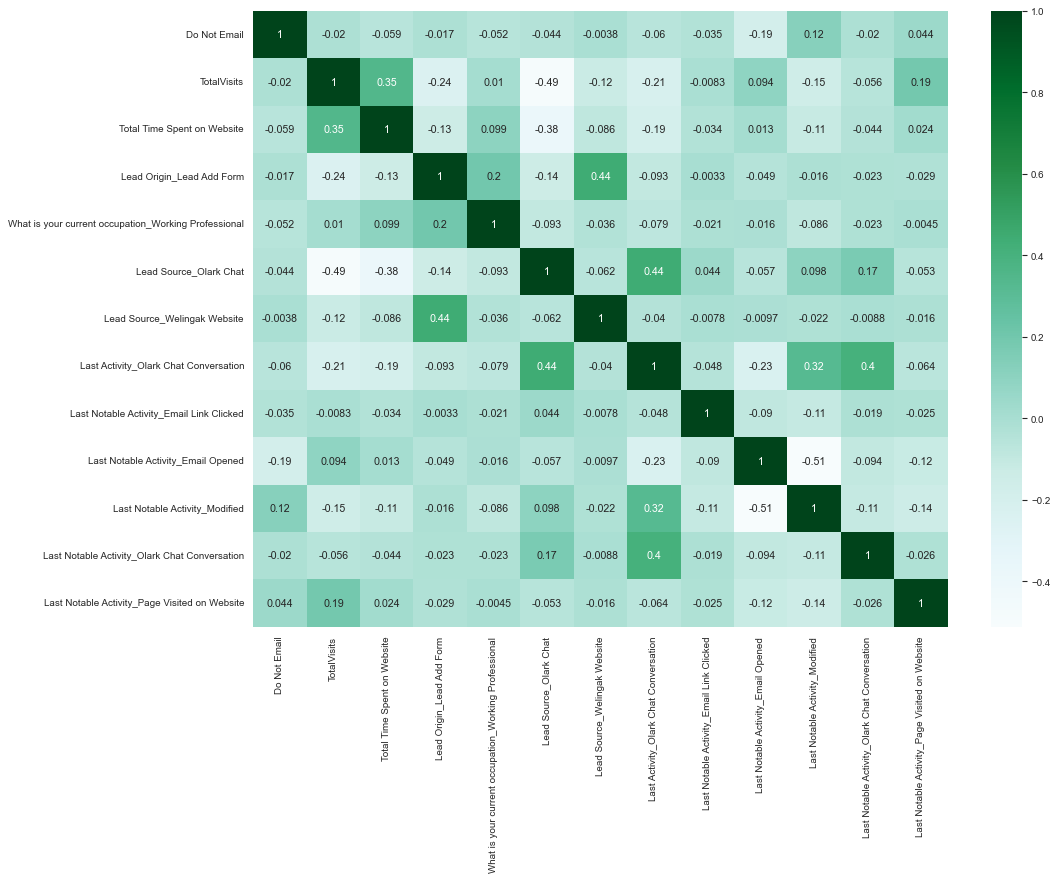

In [819]:
#checking corr again and verifying 
plt.figure(figsize=(14,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')

Corr = X_train[cols].corr()
sns.heatmap(Corr, annot=True, cmap="BuGn")

plt.show()

### Step 7: Model Prediction

In [820]:
# Predicting the probabilities on the train set for converted value
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06509847, 0.06938549, 0.01941142, 0.26207152, 0.41695108,
       0.06339621, 0.06339621, 0.12712605, 0.27750249, 0.33543269])

In [821]:
# Creating a dataframe with the actual churn flag and the predicted probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect Id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id
0,0,0.07,5493
1,0,0.07,8064
2,0,0.02,4716
3,0,0.26,9117
4,1,0.42,2402


In [822]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id,Predicted
0,0,0.07,5493,0
1,0,0.07,8064,0
2,0,0.02,4716,0
3,0,0.26,9117,0
4,1,0.42,2402,0


### step 8: Model Evaluation

In [823]:
# Checking the confusion metrics
confusion_mat = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_mat)

[[3460  449]
 [ 751 1660]]


In [824]:
# checking the overall accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.810126582278481


In [825]:
TP = confusion_mat[1,1] # True Positive 
TN = confusion_mat[0,0] # True Negatives
FP = confusion_mat[0,1] # False Positives
FN = confusion_mat[1,0] # False Negatives

In [826]:
# Checking the sensitivity of our LR model
TP / float(TP+FN)

0.6885109912899212

In [827]:
# calculating specificity
TN / float(TN+FP)

0.8851368636479918

In [828]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11486313635200819


In [829]:
# positive predictive value 
print (TP / float(TP+FP))

0.7871028923660502


In [830]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8216575635241036


Our model seems to have high accuracy (81.01%), low sensitivity (68.85%) and high specificity (88.51%).
Now we will indentify the customers which might convert, with the help of ROC Curves in the next section.

### Step 9: Plotting ROC Curve

In [831]:
def drawRoc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [832]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

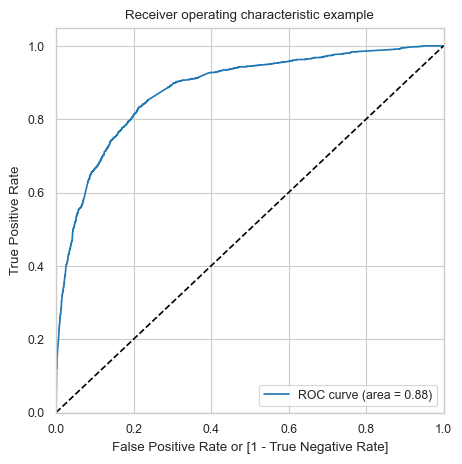

In [833]:
drawRoc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

We can see area under the curve is almost equal to 1 which is quite good. 

The area under the curve of the ROC is nearly equal to 1 which is considered as good model.Lets also check the sensitivity and specificity tradeoff to find the optimal cut off point.

### Step 10: Finding Optimal Cutoff Point

In [834]:
# creating columns with different probability cutoffs 
number = [float(x)/10 for x in range(10)]
for i in number:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.07,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.07,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.02,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.26,9117,0,1,1,1,0,0,0,0,0,0,0
4,1,0.42,2402,0,1,1,1,1,1,0,0,0,0,0


In [835]:
# Now calculating accuracy sensitivity and specificity for various probability cutoffs.

cutoff_frame = pd.DataFrame( columns = ['proba','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion_mat[1,1] # true positive 
# TN = confusion_mat[0,0] # true negatives
# FP = confusion_mat[0,1] # false positives
# FN = confusion_mat[1,0] # false negatives

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    CM1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(CM1))
    accuracy = (CM1[0,0]+CM1[1,1])/total1
    
    speci = CM1[0,0]/(CM1[0,0]+CM1[0,1])
    sensi = CM1[1,1]/(CM1[1,0]+CM1[1,1])
    cutoff_frame.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_frame)

      proba  accuracy  sensitivity  specificity
0.00   0.00      0.38         1.00         0.00
0.10   0.10      0.60         0.96         0.38
0.20   0.20      0.75         0.91         0.66
0.30   0.30      0.80         0.84         0.78
0.40   0.40      0.81         0.77         0.83
0.50   0.50      0.81         0.69         0.89
0.60   0.60      0.81         0.63         0.92
0.70   0.70      0.78         0.51         0.95
0.80   0.80      0.76         0.41         0.97
0.90   0.90      0.72         0.28         0.99


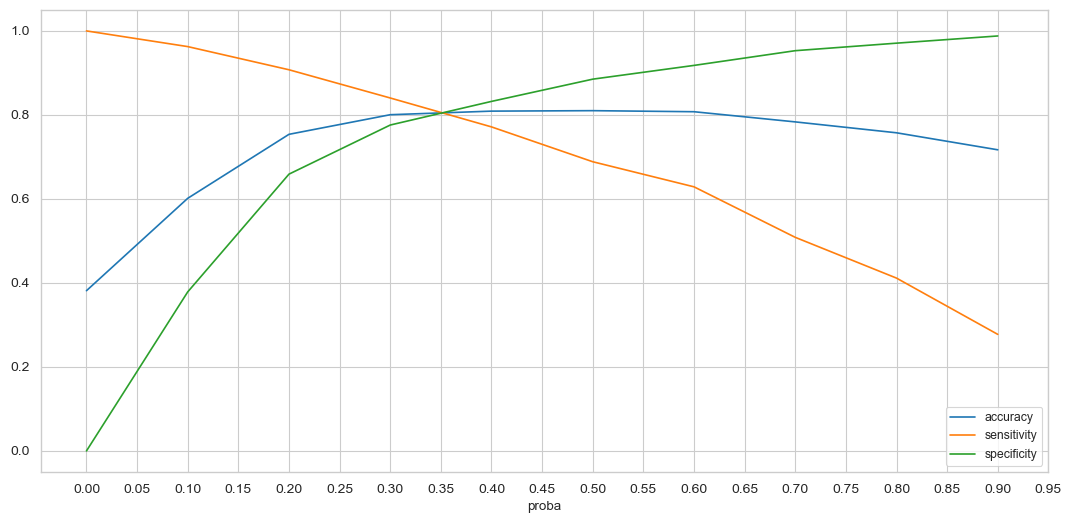

In [836]:
#Plotting Graph for accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_frame.plot.line(x='proba', y=['accuracy','sensitivity','specificity'], figsize=(13,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 10)
plt.yticks(size = 10)
plt.show()

In [837]:
# Evaluating the model with optimal probability cutoff as 0.34
y_train_pred_final['final_Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.07,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.07,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.02,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.26,9117,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.42,2402,0,1,1,1,1,1,0,0,0,0,0,1


In [838]:
# Now let us calculate the lead_score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect Id','final_Predicted','lead_score']].head(11)

,Converted,Converted_Prob,Prospect Id,final_Predicted,lead_score
0,0,0.07,5493,0,7
1,0,0.07,8064,0,7
2,0,0.02,4716,0,2
3,0,0.26,9117,0,26
4,1,0.42,2402,1,42
5,0,0.06,1796,0,6
6,0,0.06,1120,0,6
7,0,0.13,253,0,13
8,0,0.28,1491,0,28
9,1,0.34,2004,0,34


In [839]:
#Lets check  accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.8036392405063291


In [840]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3110,  799],
       [ 442, 1969]], dtype=int64)

In [841]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [842]:
# Sensitivity 
TP / float(TP+FN)

0.8166735794276234

In [843]:
# specificity
TN / float(TN+FP)

0.7955998976720389

In [844]:
# false postive rate
print(FP/ float(TN+FP))

0.2044001023279611


In [845]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7113439306358381


In [846]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8755630630630631


- **Accuracy : 80.36%**
- **Sensitivity : 81.66%**
- **Specificity : 79.55%**

In [847]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[3110,  799],
       [ 442, 1969]], dtype=int64)

In [848]:
# Precision:
pre= TP/ (TP + FP)
pre

0.7113439306358381

In [849]:
# Recall:
rec=TP/ (TP + FN)
rec

0.8166735794276234

In [850]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final["Converted"],y_train_pred_final["final_Predicted"]))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83      3909
           1       0.71      0.82      0.76      2411

    accuracy                           0.80      6320
   macro avg       0.79      0.81      0.80      6320
weighted avg       0.81      0.80      0.81      6320



In [851]:
F1 = 2*(pre*rec)/(pre+rec)
F1

0.7603784514385017

In [852]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

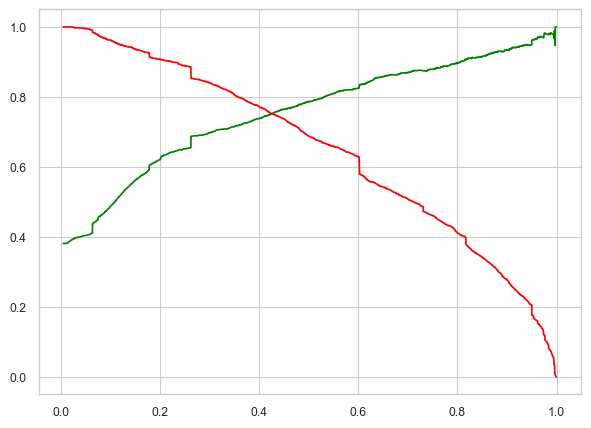

In [853]:
plt.figure(figsize=[7,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on test set

In [854]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [855]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4664,0,0.00,0.00,0,0,1,0,0,0,1,0,0,0
5394,0,0.25,0.07,0,0,1,0,0,0,0,1,0,0
1595,0,0.25,0.52,0,1,0,0,0,0,0,1,0,0
2111,0,0.44,0.23,0,0,0,0,0,0,1,0,0,0
9182,0,0.00,0.00,0,0,1,0,0,0,0,1,0,0


In [856]:
print(y_test.shape)
print(X_test.shape)

(2709,)
(2709, 13)


In [857]:
#Add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [858]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4664   0.26
5394   0.29
1595   0.90
2111   0.28
9182   0.18
1055   0.37
541    0.13
446    0.97
3728   0.06
4249   0.02
dtype: float64

In [859]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4664,0.26
5394,0.29
1595,0.90
2111,0.28
9182,0.18


In [860]:
# Converting y_test to dataframe
y_test_dataframe = pd.DataFrame(y_test)

In [861]:
y_test_dataframe['Prospect Id'] = y_test_dataframe.index

In [862]:
# Lets remove the  index of both df to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_dataframe.reset_index(drop=True, inplace=True)

In [863]:
# Appending y_test_dataframe and y_test_pred
y_pred_final = pd.concat([y_test_dataframe, y_test_pred],axis=1)

In [864]:
# Checking the head() of the final dataframe
y_pred_final.head()

,Converted,Prospect Id,0
0,0,4664,0.26
1,0,5394,0.29
2,1,1595,0.90
3,0,2111,0.28
4,0,9182,0.18


In [865]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [866]:
y_pred_final['Lead_Score_Board'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect Id,Converted_Prob,Lead_Score_Board
0,0,4664,0.26,26
1,0,5394,0.29,29
2,1,1595,0.90,90
3,0,2111,0.28,28
4,0,9182,0.18,18


In [867]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect Id','Converted','Converted_Prob', 'Lead_Score_Board'], axis=1)

In [868]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect Id,Converted,Converted_Prob,Lead_Score_Board
0,4664,0,0.26,26
1,5394,0,0.29,29
2,1595,1,0.90,90
3,2111,0,0.28,28
4,9182,0,0.18,18


In [869]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect Id,Converted,Converted_Prob,Lead_Score_Board,final_predicted
0,4664,0,0.26,26,0
1,5394,0,0.29,29,0
2,1595,1,0.90,90,1
3,2111,0,0.28,28,0
4,9182,0,0.18,18,0


In [870]:
## Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8054632705795497

In [871]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1309,  334],
       [ 193,  873]], dtype=int64)

In [872]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [873]:
# Let's check the sensitivity for our LR model
TP / float(TP+FN)

0.8189493433395872

In [874]:
# Let us calculate specificity
TN / float(TN+FP)

0.7967133292757151

- **Accuracy: 80.54%**
- **Sensitivity: 81.89%**
- **Specificity: 79.67%**

In [875]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7232808616404308

In [876]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8189493433395872

In [877]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20328667072428486


In [878]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7232808616404308


In [879]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8715046604527297


In [880]:
print(classification_report(y_pred_final["Converted"],y_pred_final["final_predicted"]))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1643
           1       0.72      0.82      0.77      1066

    accuracy                           0.81      2709
   macro avg       0.80      0.81      0.80      2709
weighted avg       0.81      0.81      0.81      2709



In [881]:
# Checking for Precision & Recall metrics for our test set

# precision
print('Precision - ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('Recall -',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision -  0.7232808616404308
Recall - 0.8189493433395872


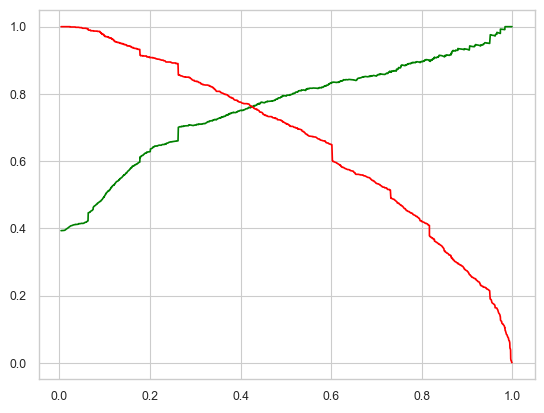

In [882]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [883]:
from sklearn.model_selection import cross_val_score

X=X_train[:200]
y=y_train[:200]

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.65 0.75 0.75 0.75 0.75 0.8  0.8  0.85 0.85 0.9 ]
0.7849999999999999


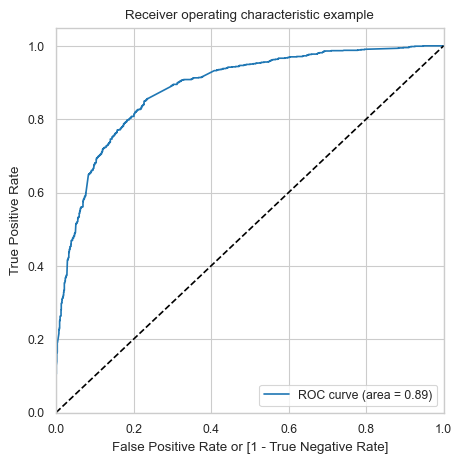

In [884]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )
drawRoc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

### Calculating the LEAD SCORE

In [885]:
#This needs to be calculated for all the leads from the original dataset (train + test)
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Prospect Id,Converted,Converted_Prob,Lead_Score_Board,final_predicted
0,4664,0,0.26,26,0
1,5394,0,0.29,29,0
2,1595,1,0.90,90,1
3,2111,0,0.28,28,0
4,9182,0,0.18,18,0


In [886]:
# Selecting the train set along with the Conversion prob and final pred value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_Prob,Prospect Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,lead_score
0,0,0.07,5493,0,1,0,0,0,0,0,0,0,0,0,0,7
1,0,0.07,8064,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.02,4716,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0.26,9117,0,1,1,1,0,0,0,0,0,0,0,0,26
4,1,0.42,2402,0,1,1,1,1,1,0,0,0,0,0,1,42


In [887]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Prospect Id','Converted','Converted_Prob','final_Predicted']]
leads_train_pred.head()

,Prospect Id,Converted,Converted_Prob,final_Predicted
0,5493,0,0.07,0
1,8064,0,0.07,0
2,4716,0,0.02,0
3,9117,0,0.26,0
4,2402,1,0.42,1


In [888]:
leads_test_pred = leads_test_pred[['Prospect Id','Converted','Converted_Prob','final_predicted']]
leads_test_pred.head()

,Prospect Id,Converted,Converted_Prob,final_predicted
0,4664,0,0.26,0
1,5394,0,0.29,0
2,1595,1,0.90,1
3,2111,0,0.28,0
4,9182,0,0.18,0


In [889]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Prospect Id,Converted,Converted_Prob,final_Predicted,final_predicted
0,5493,0,0.07,0.00,NaN
1,8064,0,0.07,0.00,NaN
2,4716,0,0.02,0.00,NaN
3,9117,0,0.26,0.00,NaN
4,2402,1,0.42,1.00,NaN


In [890]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head(5)

,Prospect Id,Converted,Converted_Prob,final_Predicted,final_predicted,Lead_Score
0,5493,0,0.07,0.00,NaN,7
1,8064,0,0.07,0.00,NaN,7
2,4716,0,0.02,0.00,NaN,2
3,9117,0,0.26,0.00,NaN,26
4,2402,1,0.42,1.00,NaN,42


In [891]:
# Inspecting the dataframe shape
lead_full_pred.shape

(9029, 6)

In [892]:
# Making the Prospect ID column as index

lead_full_pred = lead_full_pred.set_index('Prospect Id').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_Prob,final_Predicted,final_predicted,Lead_Score
Prospect Id,,,,,
0,0,0.18,NaN,0.00,18
1,0,0.31,0.00,NaN,31
2,1,0.67,1.00,NaN,67
3,0,0.09,NaN,0.00,9
4,1,0.50,1.00,NaN,50


### Determining HOT LEADS with 89% accuracy more than 80% Conversion Rate

In [893]:
# Determining hot leads with more than 80% Conversion Rate
hot_leads = lead_full_pred[lead_full_pred["Lead_Score"]>80]
hot_leads.head()

,Converted,Converted_Prob,final_Predicted,final_predicted,Lead_Score
Prospect Id,,,,,
37,1,0.83,1.00,NaN,83
64,1,0.96,NaN,1.00,96
76,1,0.85,NaN,1.00,85
77,1,1.00,NaN,1.00,100
79,1,0.99,NaN,1.00,99


In [894]:
# Hot Leads Shape
hot_leads.shape

(1589, 5)

### Determining Feature Importance

In [895]:
# lets select the coefficients of the selected features from  final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.59
TotalVisits                                             1.16
Total Time Spent on Website                             4.55
Lead Origin_Lead Add Form                               4.00
What is your current occupation_Working Professional    2.61
Lead Source_Olark Chat                                  1.47
Lead Source_Welingak Website                            2.23
Last Activity_Olark Chat Conversation                  -1.16
Last Notable Activity_Email Link Clicked               -1.79
Last Notable Activity_Email Opened                     -1.45
Last Notable Activity_Modified                         -1.94
Last Notable Activity_Olark Chat Conversation          -1.77
Last Notable Activity_Page Visited on Website          -1.97
dtype: float64

In [896]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending = False)

Total Time Spent on Website                            100.00
Lead Origin_Lead Add Form                               87.88
What is your current occupation_Working Professional    57.28
Lead Source_Welingak Website                            48.88
Lead Source_Olark Chat                                  32.28
TotalVisits                                             25.44
Last Activity_Olark Chat Conversation                  -25.50
Last Notable Activity_Email Opened                     -31.80
Do Not Email                                           -34.90
Last Notable Activity_Olark Chat Conversation          -38.87
Last Notable Activity_Email Link Clicked               -39.41
Last Notable Activity_Modified                         -42.72
Last Notable Activity_Page Visited on Website          -43.32
dtype: float64

### Ranking features based on importance

In [897]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            12
TotalVisits                                             10
Total Time Spent on Website                              8
Lead Origin_Lead Add Form                               11
What is your current occupation_Working Professional     0
Lead Source_Olark Chat                                   9
Lead Source_Welingak Website                             7
Last Activity_Olark Chat Conversation                    1
Last Notable Activity_Email Link Clicked                 5
Last Notable Activity_Email Opened                       6
Last Notable Activity_Modified                           4
Last Notable Activity_Olark Chat Conversation            3
Last Notable Activity_Page Visited on Website            2
dtype: int64

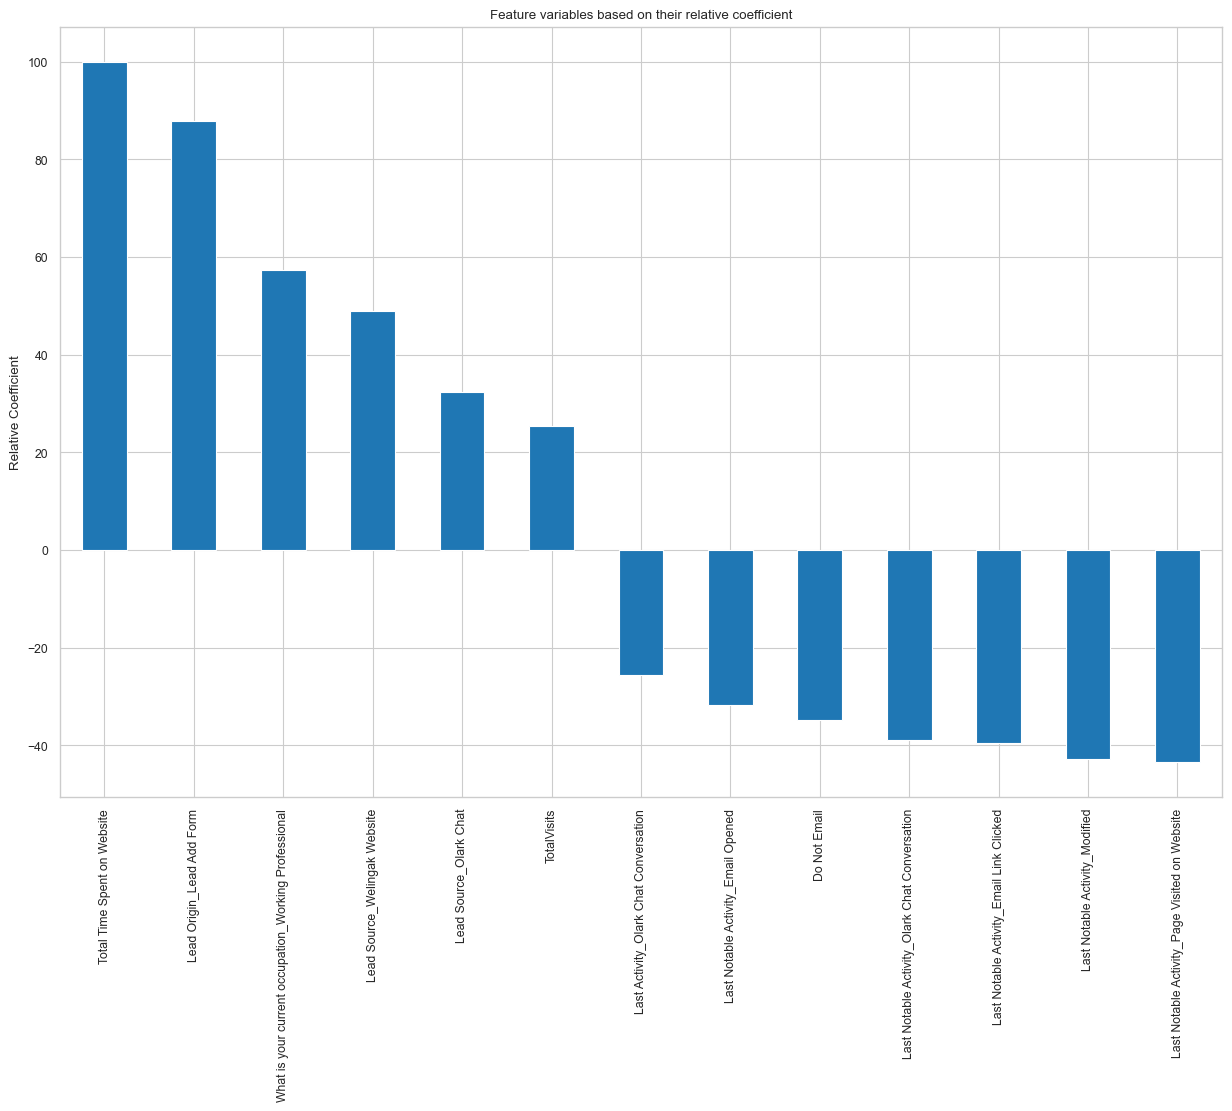

In [898]:
# Plot depecting the feature variables based on their relative coefficient valeu
plt.figure(figsize = (15,10))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [899]:
# getting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
2,Total Time Spent on Website,100.00
3,Lead Origin_Lead Add Form,87.88
4,What is your current occupation_Working Profes...,57.28


In [900]:
# Selecting Least 3 features which contribute least towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).tail(3)

,index,0
8,Last Notable Activity_Email Link Clicked,-39.41
10,Last Notable Activity_Modified,-42.72
12,Last Notable Activity_Page Visited on Website,-43.32


### <center> Results

#### After trying several models, we finally chose a model no 3 with the following characteristics:

- All variables have p-value < 0.05, showing significant features contributing towards Lead Conversion.
- All the features have very low VIF values, means hardly there is any muliticollinearity among the features. This can be infer
  from the heat map.
- The ROC curve has a value of 1, which is very good!
- The overall accuracy of Around 80% at a probability threshold of 0.34 on the test dataset is also very acceptable.


- **For Train Data**
  - Accuracy           : 80.36%
  - Sensitivity/Recall : 81.66%
  - Specificity        : 79.55%
  - False positive rate - predicting the lead conversion when the lead does not convert:  0.20
  - Precision/Positive predictive value:  71.13%
  - Negative predictive value:  87.55%
  - ROC : 1
  - F1 Score : 0.760
  
  <br>

- **For Test Data**
  - Accuracy           :  80.354%
  - Sensitivity/Recall :  81.89%
  - Specificity        :  79.67%
  - False postive rate - predicting the lead conversion when the lead does not convert:  0.20
  - Precision/Positive predictive value:  72.32%
  - Negative predictive value:  87.15%
  - ROC : 1.0


- **The optimal threshold for the model is 0.34** which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.



### <center> Conclusion  and observation

**Final Observation:**

So our model seems to be performing well. The ROC curve has a value near to 1, which is very good.

High  lead score means high chance of conversion 

These top 3 contribed most towards lead conversion are 
Total Time Spent on Website	
Lead Origin_Lead Add Form	
What is your current occupation_Working Profes